In [102]:
import numpy as np

## 初始化pi: 
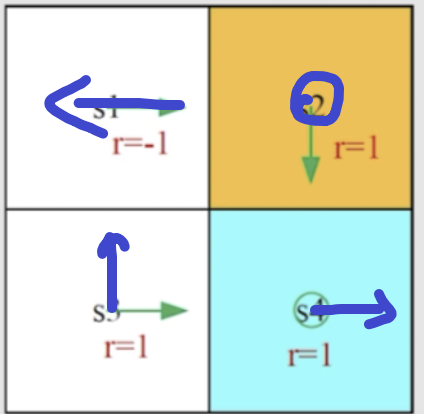

In [103]:
def get_v_pi(P, omega):
    
    v_li = []
    v_li.append(np.array([[0],[0],[0],[0]]))
    r_pi = []
    for i in range(4):
        while True:
            try:
                # 输入每个状态的立即期望奖励
                r = float(input(f"输入第{i+1}个状态的立即期望奖励: "))
                break
            except ValueError:
                if r == "exit":
                    return
                # print("输入格式错误，请重新输入整数")
                pass
        r_pi.append([r])
    
    for i in range(1, 300):
        v = r_pi + omega * P @ v_li[i - 1]
        v_li.append(v)
    return v_li[-1]

def policy_update(pi, P, omega, n_states, n_actions, action_dic):

    action = pi.argmax(-1)
    for i in range(n_states):
        print(f"第{i+1}个状态的动作为: {action_dic[action[i]]}")

    # 计算v_pi
    v_pi = get_v_pi(P, omega)
    print(f"Value State: {v_pi.ravel()}")

    # 给定s, a 算出当前a的奖励期望
    r_expctaion_s_a = [[-1, -1, 0, -1, 0],
                    [-1, -1, 1, 0, -1],
                    [0, 1, -1, -1, 0],
                    [-1, -1, -1, 0, 1]]

    # 给定s, a 算出下一个状态值期望
    next_v_pi_s_a = [[v_pi[0], v_pi[1], v_pi[2], v_pi[0], v_pi[0]],
                    [v_pi[1], v_pi[1], v_pi[3], v_pi[0], v_pi[1]],
                    [v_pi[0], v_pi[3], v_pi[2], v_pi[2], v_pi[2]],
                    [v_pi[1], v_pi[3], v_pi[3], v_pi[2], v_pi[3]]]
    # 计算q_pi
    q_pi = []
    for s in range(n_states):
        q_s = []
        for a in range(n_actions):
            q_s.append(r_expctaion_s_a[s][a] + omega * next_v_pi_s_a[s][a][0])
        q_pi.append(q_s)
    q_pi = np.asarray(q_pi)
    print(f"Action State: \n{q_pi}")

    # 更新pi和P
    pi = np.zeros_like(pi)
    P = np.zeros_like(P)
    for i in range(n_states):
        a_star = q_pi[i].argmax()
        pi[i][a_star] = 1
        print(f"更新后的第{i+1}个状态的动作为: {action_dic[a_star]}")
        try:
            while True:
                next_state = int(input(f"更新后的第{i+1}个状态转移为:")) - 1
                P[i][next_state] = 1
                break
        except:
            if next_state == "exit":
                return
        print()
            

    # print(f"更新后的Policy与P:")
    # action = pi.argmax(-1)
    # for i in range(n_states):
    #     print(f"第{i+1}个状态的动作为: {action_dic[action[i]]}")
    #     print(f"第{i+1}个状态的转移为: {P[i].argmax() + 1}状态\n")
    print("*" * 100)
    return pi, P

In [ ]:
n_states = 4
n_actions = 5
omega = 0.9
# pi(a|s), (s, a) = (4, 5)
pi = np.array([[0, 0, 0, 1, 0],
               [0, 0, 0, 0, 1],
               [1, 0, 0, 0, 0],
               [0, 1, 0, 0, 0]])

# 状态转移矩阵
P = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [1, 0, 0, 0],
              [0, 0, 0, 1]])

action_dic = {
    0: "向上",
    1: "向右",
    2: "向下",
    3: "向左",
    4: "不动"
}
for i in range(5):
    print(f"第{i+1}次更新:\n")
    pi, P = policy_update(pi, P, omega, n_states, n_actions, action_dic)